<a href="https://colab.research.google.com/github/gchaewon/ML_team11/blob/main/experiment_open_multi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 0. Download the dataset

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1R8MNL6ztBm5ykKqIPZskZOYnF6Kcn6Nn' -O open_multi_data.csv

--2023-12-10 16:35:00--  https://docs.google.com/uc?export=download&id=1R8MNL6ztBm5ykKqIPZskZOYnF6Kcn6Nn
Resolving docs.google.com (docs.google.com)... 172.253.63.102, 172.253.63.100, 172.253.63.101, ...
Connecting to docs.google.com (docs.google.com)|172.253.63.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-ac-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2ca2igechf8741ht0ejeanrhl7u45nv5/1702226100000/02545855121528690953/*/1R8MNL6ztBm5ykKqIPZskZOYnF6Kcn6Nn?e=download&uuid=af526429-c453-4baf-8b93-8168f94212f1 [following]
--2023-12-10 16:35:01--  https://doc-04-ac-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2ca2igechf8741ht0ejeanrhl7u45nv5/1702226100000/02545855121528690953/*/1R8MNL6ztBm5ykKqIPZskZOYnF6Kcn6Nn?e=download&uuid=af526429-c453-4baf-8b93-8168f94212f1
Resolving doc-04-ac-docs.googleusercontent.com (doc-04-ac-docs.googleusercontent.com)... 142.251.163.132, 2607:f8b0

In [ ]:
import pandas as pd
data = pd.read_csv('open_multi_data.csv')

data.head()

,first_in,avg_out_order,mean_out_order,first_out,count_out,fraction_in,time_stamp_max,fraction_out,burst_mean,sum_total,...,avg_in_order,c_packet_size_max,count_in,std_in_order,c_packet_size_mean,count_total,burst_std,burst_max,time_stamp_std,time_stamp_mean
0,21.0,773.322314,773.322314,9.0,121.0,0.914849,10.14,0.085151,-3869.538462,2842.0,...,704.106154,0.0,1300.0,398.486335,-307557.787474,1421.0,7789.548217,4096.0,1.128342,4.315749
1,22.0,226.162500,226.162500,8.0,80.0,0.845560,10.16,0.154440,-1949.957447,1036.0,...,264.406393,0.0,438.0,150.591146,-86710.857143,518.0,5249.774082,2560.0,1.370610,4.611815
2,23.0,786.110169,786.110169,7.0,118.0,0.913108,11.11,0.086892,-3779.368421,2716.0,...,668.259677,0.0,1240.0,381.878642,-297018.438881,1358.0,7556.379781,3072.0,1.179265,5.488969
3,21.0,820.139344,820.139344,9.0,122.0,0.915629,13.36,0.084371,-3846.400000,2892.0,...,713.503021,0.0,1324.0,406.205288,-316360.409405,1446.0,7779.407319,2560.0,1.708888,5.995512
4,22.0,789.608696,789.608696,8.0,115.0,0.918208,10.64,0.081792,-3810.835443,2812.0,...,694.740511,0.0,1291.0,395.028889,-308565.940256,1406.0,7380.684093,2560.0,1.297085,4.698869


In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=15oaaaUVQN9TUEP_Cg5f5c_9UFTQhXIgn' -O open_multi_target.csv

--2023-12-10 16:35:30--  https://docs.google.com/uc?export=download&id=15oaaaUVQN9TUEP_Cg5f5c_9UFTQhXIgn
Resolving docs.google.com (docs.google.com)... 172.253.115.102, 172.253.115.100, 172.253.115.139, ...
Connecting to docs.google.com (docs.google.com)|172.253.115.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-ac-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pvrdd2ne19n96v8elrc3imdotstgt94p/1702226100000/02545855121528690953/*/15oaaaUVQN9TUEP_Cg5f5c_9UFTQhXIgn?e=download&uuid=d3619675-b651-4ff2-bf2e-54bd99b65770 [following]
--2023-12-10 16:35:30--  https://doc-08-ac-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pvrdd2ne19n96v8elrc3imdotstgt94p/1702226100000/02545855121528690953/*/15oaaaUVQN9TUEP_Cg5f5c_9UFTQhXIgn?e=download&uuid=d3619675-b651-4ff2-bf2e-54bd99b65770
Resolving doc-08-ac-docs.googleusercontent.com (doc-08-ac-docs.googleusercontent.com)... 142.251.163.132, 2607:

In [ ]:
target = pd.read_csv('open_multi_target.csv')
target.head()

,web_site
0,0
1,0
2,0
3,0
4,0


Split into training and testing sets

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X, y = data.to_numpy(), target.to_numpy().ravel()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

check accuracy before tunning

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8148275862068965

Classification Report:
               precision    recall  f1-score   support

          -1       0.82      0.93      0.87      2044
           0       0.68      0.76      0.71        33
           1       0.85      0.70      0.77        40
           2       0.97      0.82      0.89        39
           3       0.93      0.81      0.87        32
           4       0.91      0.93      0.92        43
           5       0.88      0.82      0.85        44
           6       0.71      0.88      0.78        33
           7       0.83      0.91      0.87        44
           8       0.80      0.80      0.80        44
           9       0.75      0.75      0.75        40
          10       0.80      0.76      0.78        42
          11       0.93      0.65      0.76        40
          12       0.82      0.90      0.86        40
          13       0.79      0.62      0.70        37
          14       0.77      0.67      0.72        36
          15       0.82    

## 1. Tunning Experiment

### 1) RandomForest

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=0)

# Flatten the target variable for GridSearchCV
y_train_flat = y_train.values.ravel()

# Define the parameter grid
param_grid = {
    'n_estimators': [200, 400],
    'max_depth': [30, 40],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create the grid search model
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train_flat)

# Print the best parameters found
print("Best Parameters:", grid_search_rf.best_params_)

# Use the best parameters to create a new Random Forest classifier
best_params_rf = RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)

# Train the model with the best parameters
best_params_rf.fit(X_train, y_train_flat)

# Make predictions
y_pred_best_params = best_params_rf.predict(X_test)

# Evaluate performance
print("Accuracy with Best Parameters:", accuracy_score(y_test, y_pred_best_params))
print("\nClassification Report with Best Parameters:\n", classification_report(y_test, y_pred_best_params))
print("\nConfusion Matrix with Best Parameters:\n", confusion_matrix(y_test, y_pred_best_params))


Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Accuracy with Best Parameters: 0.8158620689655173

Classification Report with Best Parameters:
               precision    recall  f1-score   support

          -1       0.83      0.93      0.87      2044
           0       0.71      0.73      0.72        33
           1       0.88      0.72      0.79        40
           2       0.89      0.82      0.85        39
           3       0.89      0.78      0.83        32
           4       0.95      0.95      0.95        43
           5       0.90      0.80      0.84        44
           6       0.72      0.88      0.79        33
           7       0.78      0.91      0.84        44
           8       0.79      0.77      0.78        44
           9       0.79      0.82      0.80        40
          10       0.84      0.76      0.80        42
          11       0.89      0.62      0.74        40
          12       0.82      0.93      0.87 

### 2) Gradient boosting

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 랜덤 서치 객체 생성
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=param_grid,
    n_iter=10,
    random_state=42,
    cv=5  # 교차 검증(Cross-validation) 폴드 수
)

# 랜덤 서치 수행
random_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", random_search.best_params_)

# 테스트 데이터에 모델 적용 및 평가
y_pred = random_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("테스트 데이터 정확도:", accuracy)


최적의 하이퍼파라미터: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
테스트 데이터 정확도: 0.81


### 3) Random forest + gradient boosting

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=0)

# Create individual models
rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=30, min_samples_split=2, min_samples_leaf=1, random_state=42)
gb_classifier = GradientBoostingClassifier(learning_rate=0.2, max_depth=5, n_estimators=200)

# Create a Voting Classifier
voting_classifier = VotingClassifier(estimators=[('random_forest', rf_classifier), ('gradient_boosting', gb_classifier)], voting='soft')

# Fit the Voting Classifier to the data
voting_classifier.fit(X_train, y_train.values.ravel())

# Make predictions
y_pred_voting = voting_classifier.predict(X_test)

# Evaluate performance
print("Accuracy with Voting Classifier:", accuracy_score(y_test, y_pred_voting))
print("\nClassification Report with Voting Classifier:\n", classification_report(y_test, y_pred_voting))
print("\nConfusion Matrix with Voting Classifier:\n", confusion_matrix(y_test, y_pred_voting))


Accuracy with Voting Classifier: 0.06137931034482759

Classification Report with Voting Classifier:
               precision    recall  f1-score   support

          -1       0.95      0.11      0.20      2044
           0       0.00      0.00      0.00        33
           1       0.00      0.00      0.00        40
           2       0.00      0.00      0.00        39
           3       0.00      0.00      0.00        32
           4       0.00      0.00      0.00        43
           5       0.00      0.00      0.00        44
           6       0.00      0.00      0.00        33
           7       0.00      0.00      0.00        44
           8       1.00      0.05      0.09        44
           9       0.33      0.07      0.12        40
          10       0.12      0.02      0.04        42
          11       0.00      0.00      0.00        40
          12       1.00      0.15      0.26        40
          13       0.00      0.00      0.00        37
          14       0.04      0.03 

/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 2. Validation

### 1) k-fold cross validation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

num_splits = 5

kf = KFold(n_splits=num_splits, shuffle=True, random_state=42)
cv_accuracy = []
n_iter = 0

for train_index, test_index in kf.split(data):
    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]

    knn = KNeighborsClassifier(n_neighbors=5)

    knn.fit(X_train, y_train.values.ravel())
    pred = knn.predict(X_test)
    n_iter += 1

    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 : {1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스: {1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)

print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 : 0.536, 학습 데이터 크기: 23200, 검증 데이터 크기: 5800
#1 검증 세트 인덱스: [    3     6    17 ... 28984 28992 28999]

#2 교차 검증 정확도 : 0.5467, 학습 데이터 크기: 23200, 검증 데이터 크기: 5800
#2 검증 세트 인덱스: [    0     7    19 ... 28990 28995 28997]

#3 교차 검증 정확도 : 0.5528, 학습 데이터 크기: 23200, 검증 데이터 크기: 5800
#3 검증 세트 인덱스: [    4     5     8 ... 28987 28991 28994]

#4 교차 검증 정확도 : 0.5307, 학습 데이터 크기: 23200, 검증 데이터 크기: 5800
#4 검증 세트 인덱스: [    1     2    10 ... 28969 28970 28993]

#5 교차 검증 정확도 : 0.5443, 학습 데이터 크기: 23200, 검증 데이터 크기: 5800
#5 검증 세트 인덱스: [    9    11    13 ... 28989 28996 28998]

## 평균 검증 정확도: 0.5420999999999999


### 2) Micro-average ROC curve

/opt/homebrew/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


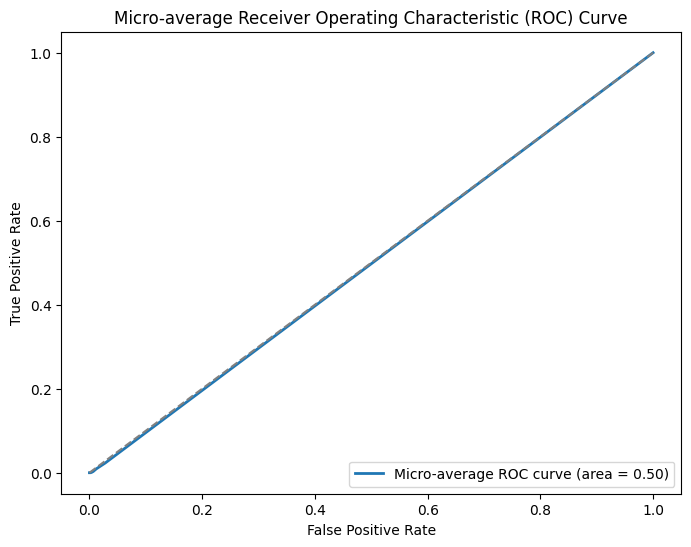

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train, y_train)

y_probs = model.predict_proba(X_test)

n_classes = len(np.unique(target))
y_test_binary = label_binarize(y_test, classes=np.arange(n_classes))

fpr, tpr, _ = roc_curve(y_test_binary.ravel(), y_probs.ravel())
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'Micro-average ROC curve (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### 3) PR curve

PR Curve

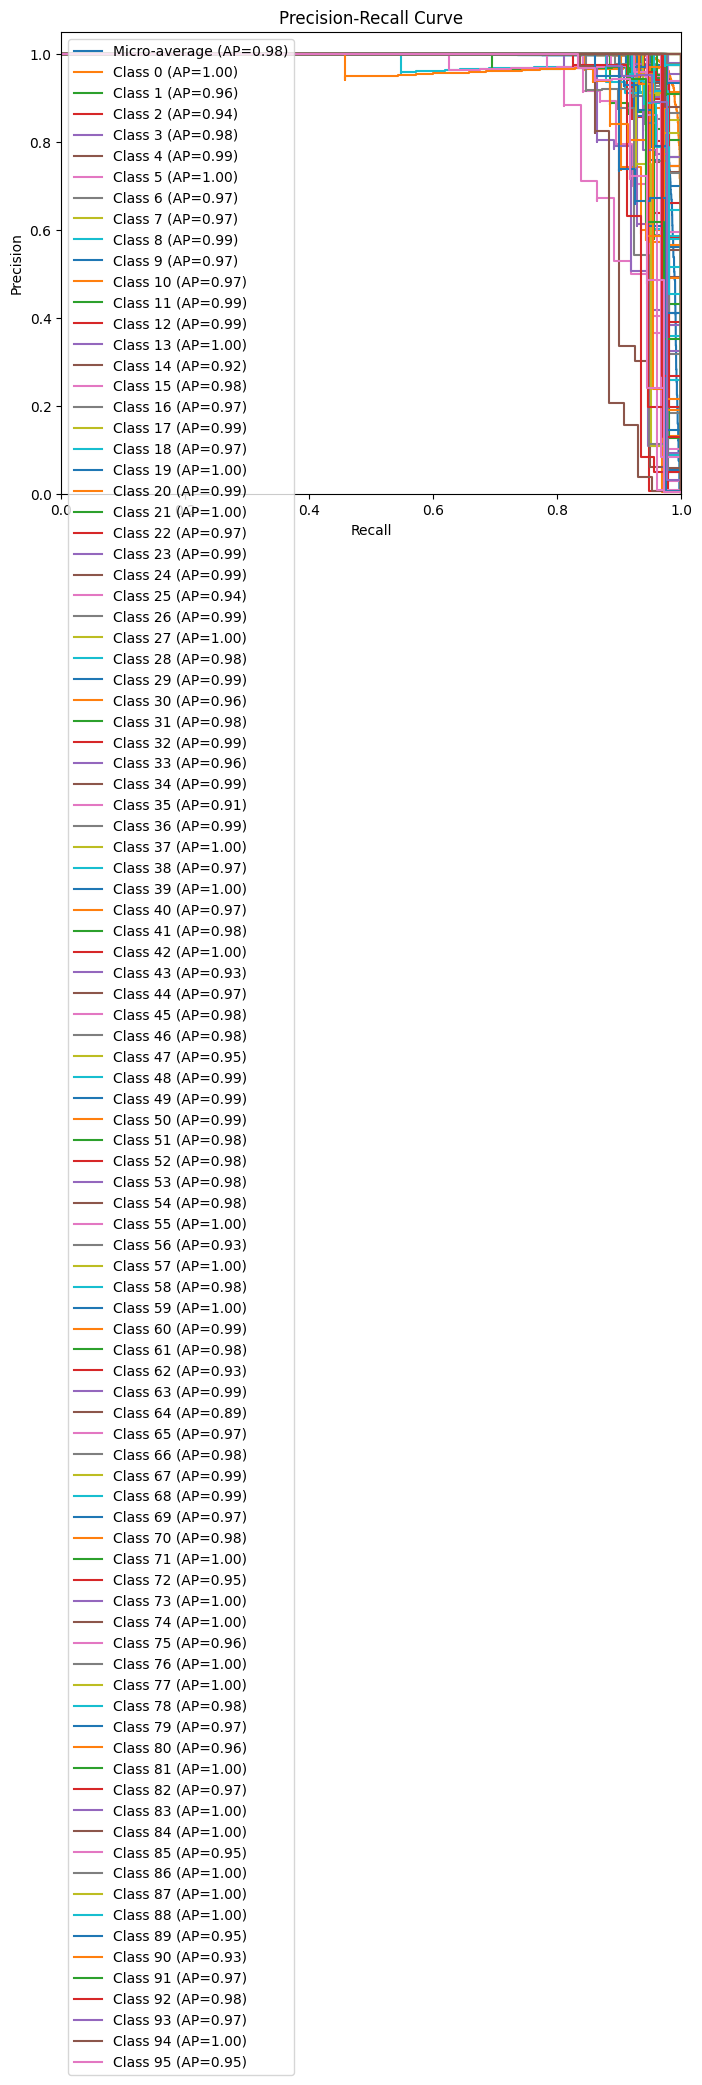

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

y_pred_prob = best_params_rf.predict_proba(X_test)

y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

precision = dict()
recall = dict()
average_precision = dict()

for i in range(np.unique(y_test).shape[0]):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    average_precision[i] = average_precision_score(y_test_binarized[:, i], y_pred_prob[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_binarized.ravel(), y_pred_prob.ravel())
average_precision["micro"] = average_precision_score(y_test_binarized, y_pred_prob, average='micro')

plt.figure(figsize=(8, 6))
plt.step(recall['micro'], precision['micro'], where='post', label='Micro-average (AP={0:0.2f})'.format(average_precision["micro"]))
for i in range(np.unique(y_test).shape[0]):
    plt.step(recall[i], precision[i], where='post', label='Class {0} (AP={1:0.2f})'.format(i, average_precision[i]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()



### 4) Macro-average PR curve

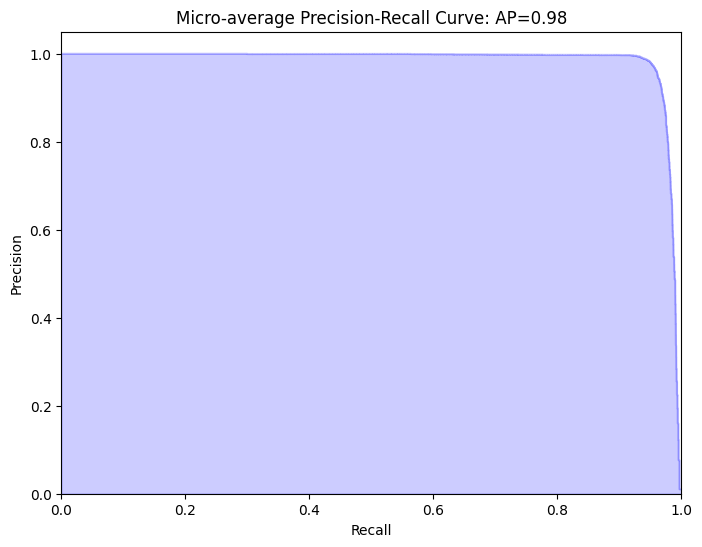

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve

y_pred_prob = best_params_rf.predict_proba(X_test)

y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

precision, recall, _ = precision_recall_curve(y_test_binarized.ravel(), y_pred_prob.ravel())

average_precision = average_precision_score(y_test_binarized, y_pred_prob, average='micro')

plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Micro-average Precision-Recall Curve: AP={0:0.2f}'.format(average_precision))
plt.show()
